In [1]:
from osgeo import gdal, osr, gdalconst
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
cd

C:\Users\thiba


In [3]:
# Chemin vers les images brutes téléchargées
path = 'Documents/EO_Browser_images_uint16'

In [4]:
# Load individual bands
red_band = gdal.Open(f"{path}/2022-04-16-00[]00_2022-04-16-23[]59_Sentinel-2_L2A_B04_(Raw).tiff")
green_band = gdal.Open(f"{path}/2022-04-16-00[]00_2022-04-16-23[]59_Sentinel-2_L2A_B03_(Raw).tiff")
blue_band = gdal.Open(f"{path}/2022-04-16-00[]00_2022-04-16-23[]59_Sentinel-2_L2A_B02_(Raw).tiff")

In [5]:
#affichage des projections des bandes
for i in [red_band,green_band,blue_band]:
    print("Projection: ", i.GetProjection())  # get projection
    print("Columns:", i.RasterXSize)  # number of columns
    print("Rows:", i.RasterYSize)  # number of rows
    print("Band count:", i.RasterCount)  # number of bands
    print("-----------------------------------------")

Projection:  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]
Columns: 1715
Rows: 860
Band count: 2
-----------------------------------------
Projection:  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["

In [6]:
# Lire les tableaux numpy correspondant à chaque image
array_r = red_band.ReadAsArray().astype(np.float32)[0]
array_g = green_band.ReadAsArray().astype(np.float32)[0]
array_b = blue_band.ReadAsArray().astype(np.float32)[0]

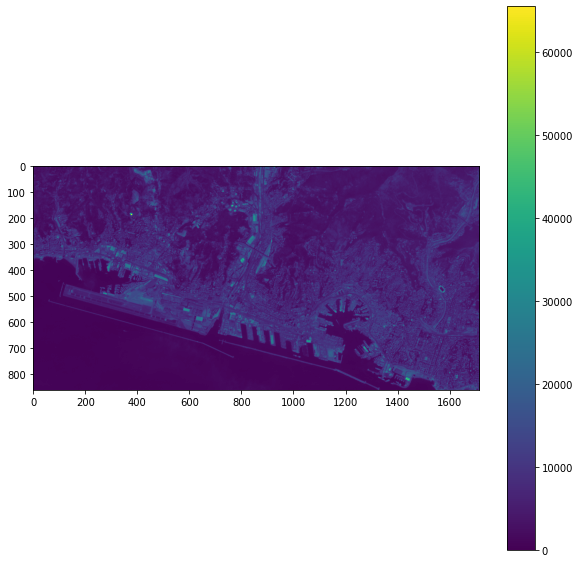

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(array_r)
plt.colorbar()

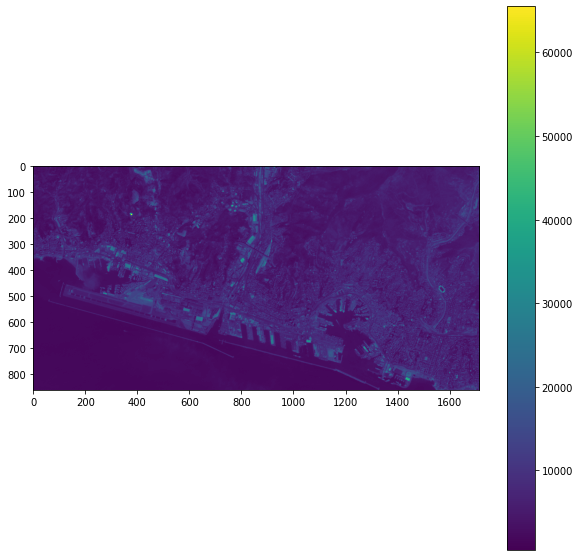

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(array_g)
plt.colorbar()

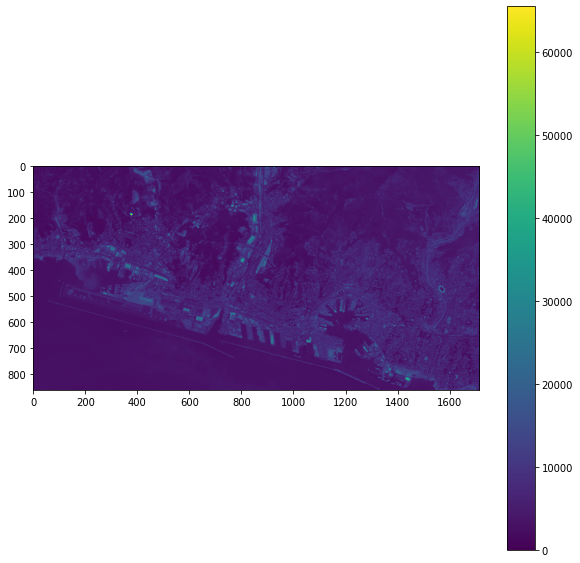

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(array_b)
plt.colorbar()

In [10]:
# Normalisation des valeurs
array_r = array_r * 255.0/array_r.max()
array_g = array_g * 255.0/array_g.max()
array_b = array_b * 255.0/array_b.max()

In [11]:
# Appliquer un bon niveau de contraste aux données
array_r = (array_r).clip(0, 255)
array_g = (array_g).clip(0, 255)
array_b = (array_b).clip(0, 255)

In [12]:
# Empiler les tableaux numpy des 3 images de la bande
rgb_image = np.dstack((array_r, array_g, array_b))
# Conversion en uint8
rgb_image = rgb_image.astype(np.uint8)
# Afficher l'image en couleur
# Sauvegarde et affichage de l'image
im = Image.fromarray(rgb_image, 'RGB')
im.save("pont.png")
im.show()

## Récupération du carré autour du pont

In [13]:
# Coordonnées du point à rogner
lat = 44.4261111  # Latitude en degrés
lon = 8.88861111111111   # Longitude en degrés

In [14]:
# Obtenir la transformation géométrique de l'image
geotransform = red_band.GetGeoTransform()

In [15]:
# Extraire la taille du pixel en X à partir de la transformation géométrique
pixel_size = geotransform[1]

image_height, image_width, _ = rgb_image.shape
x = int((lon + 180) * (image_width / 360))
y = int((90 - lat) * (image_height / 180))

In [17]:
# Vérifier si les coordonnées sont à l'intérieur de l'image
if x >= 0 and x < image_width and y >= 0 and y < image_height:
    print(f"Les coordonnées ({lat}N, {lon}E) sont à l'intérieur de l'image.")
    # Calculer les limites du carré de 2 km x 2 km
    half_size = int(2000 / pixel_size)
    xmin = max(0, x - half_size)
    ymin = max(0, y - half_size)
    xmax = min(image_width, x + half_size)
    ymax = min(image_height, y + half_size)

    # Rogner l'image
    cropped_image = rgb_image[ymin:ymax, xmin:xmax, :]

    # Afficher l'image rognée
    im = Image.fromarray(cropped_image, 'RGB')
    im.save("PycharmProjects\RousselEOnsight\pont_crop.png")
    im.show()
else:
    print(f"Les coordonnées ({lat}N, {lon}E) sont en dehors de l'image.")


Les coordonnées (44.4261111N, 8.88861111111111E) sont à l'intérieur de l'image.
